In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# we need to predict price

In [23]:
# our data set contain 2 file one for training & other for for testing
# no need for train test split
# we need to preprocess both data set

In [24]:
df=pd.read_csv("../../../Bigdata Files/train-data.csv")

In [25]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [26]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [27]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [28]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [29]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [31]:
# encoding columns
# name,location,fuel,transmission,owner type

In [32]:
# column to drop
# new price : unnamed (not useful),new price (5195 null values)
# 90% missing values

In [33]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [34]:
df.Name.value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1878, dtype: int64

<Axes: xlabel='Name', ylabel='Count'>

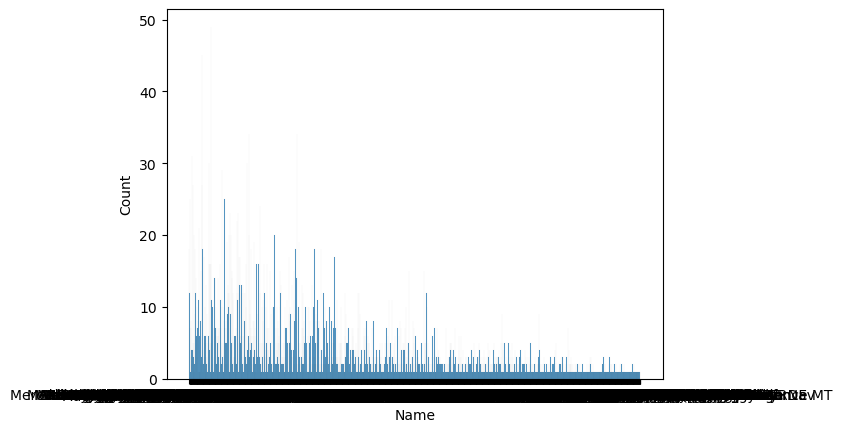

In [35]:
sns.histplot(df.Name)

<Axes: xlabel='Name', ylabel='count'>

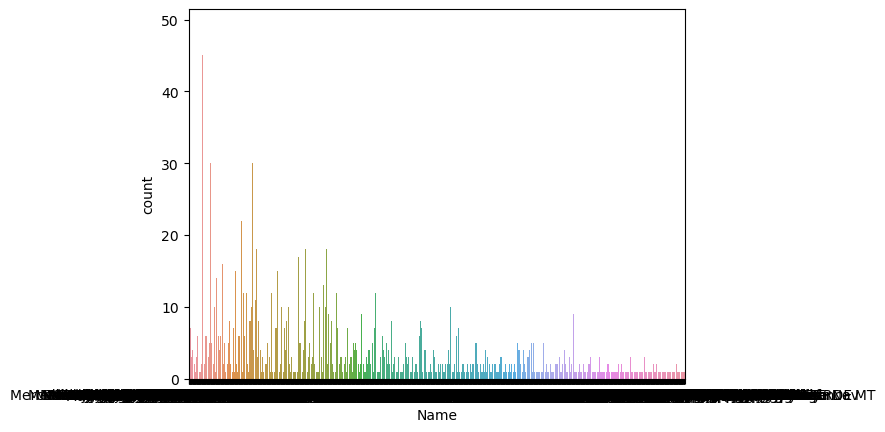

In [36]:
sns.countplot(x="Name",data=df)

In [37]:
df.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

<Axes: xlabel='Location', ylabel='count'>

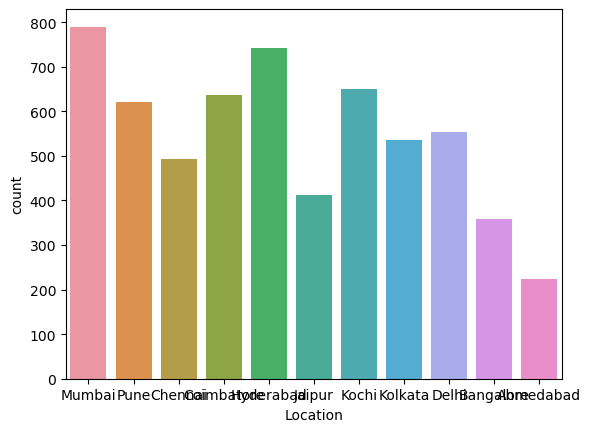

In [38]:
sns.countplot(x="Location",data=df)

<Axes: xlabel='Location', ylabel='Count'>

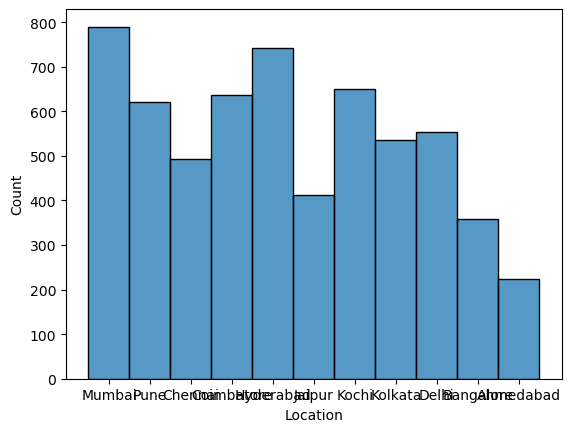

In [39]:
sns.histplot(df.Location)

In [40]:
df.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

<Axes: xlabel='Fuel_Type', ylabel='Count'>

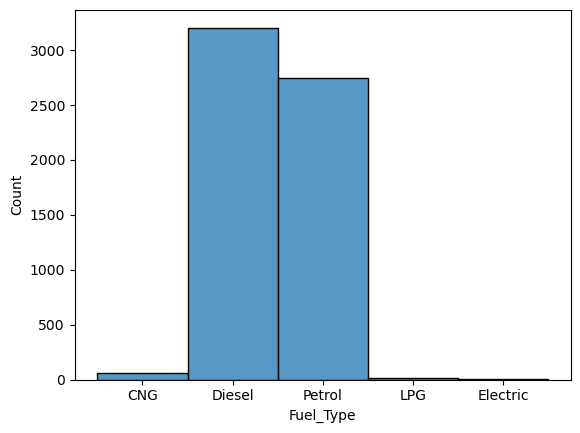

In [41]:
sns.histplot(df.Fuel_Type)

<Axes: xlabel='Fuel_Type', ylabel='count'>

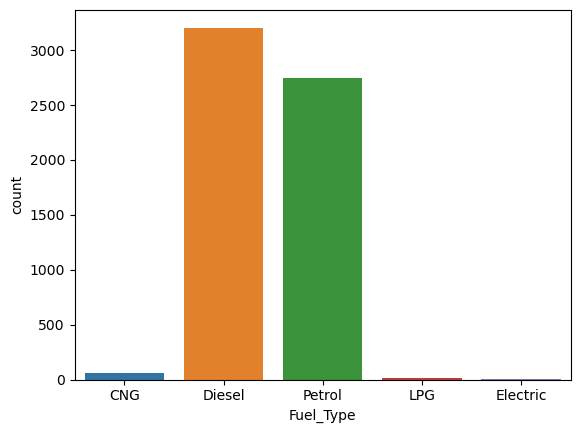

In [121]:
sns.countplot(x="Fuel_Type",data=df)

In [42]:
df.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

<Axes: xlabel='Transmission', ylabel='Count'>

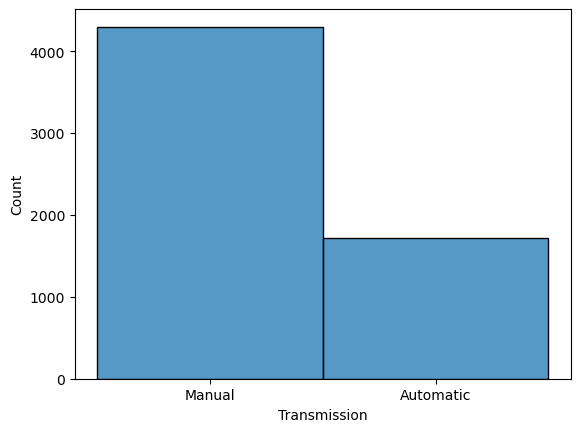

In [43]:
sns.histplot(df.Transmission)

<Axes: xlabel='Transmission', ylabel='count'>

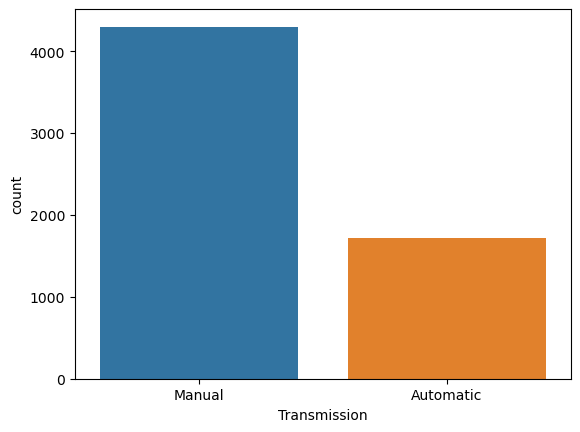

In [122]:
sns.countplot(x="Transmission",data=df)

In [44]:
df.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

<Axes: xlabel='Owner_Type', ylabel='Count'>

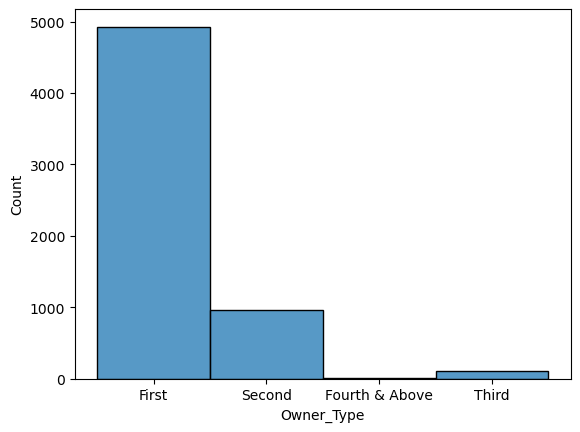

In [45]:
sns.histplot(df.Owner_Type)

<Axes: xlabel='Owner_Type', ylabel='count'>

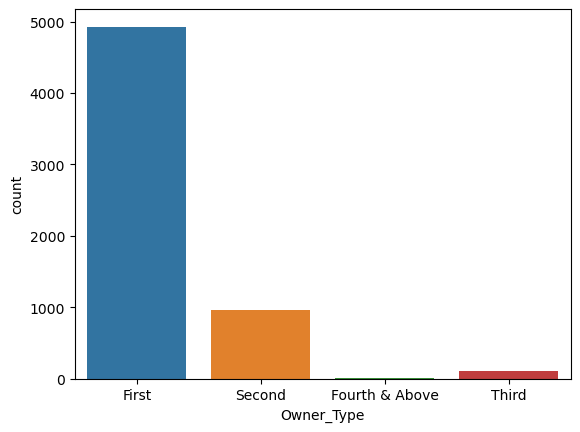

In [123]:
sns.countplot(x="Owner_Type",data=df)

In [46]:
df.Name.value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1878, dtype: int64

In [47]:
# if we enhotcoding to Name columns it takes 1878 columna
# we need to drop  Name column : name length is 1878 columns 
# so features will be increased 
# possible for underfitting
# actuall it is error (we cannot predict names)
# other wise we need to apply label encoding

In [48]:
# so dropping columns Name,Unnamed,New Price

In [49]:
# df=df.drop([],inplace=True,axis=1)

In [50]:
# encoding

In [51]:
# get_dummies : encoding technique

In [52]:
# df1=pd.get_dummies(df[["Location","Fuel_Type","Transmission","Owner_Type"]])
# df1

In [53]:
df1=pd.get_dummies(df[["Location","Fuel_Type","Transmission","Owner_Type"]],drop_first=True)
df1

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [54]:
# 18 columns will be gernated

In [55]:
# we need to join both data frame

In [56]:
dfe=pd.concat([df,df1],axis=1)
dfe

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,1,0,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,1,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,0,0,1,0,0,0,1,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,0,0,1,0,0,0,1,0,1,0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,0,0,0,0,0,1,1,0,0,0


In [57]:
# total 32 columns 14+18 columns

In [58]:
dfe=dfe.drop(["Unnamed: 0","Name","Location","Fuel_Type","Transmission","Owner_Type","New_Price"],axis=1)

In [59]:
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [60]:
# dfe=pd.concat([df,df1],axis=1)
# dfe.transpose()

In [61]:
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [62]:
# unit8 unsigned means encoded values

In [63]:
dfe["Mileage"]=dfe["Mileage"].str.replace("km/kg","")
dfe["Mileage"]=dfe["Mileage"].str.replace("kmpl","")
dfe["Engine"]=dfe["Engine"].str.replace("CC","")
dfe["Power"]=dfe["Power"].str.replace("bhp","")
# engine,mileage has null typed values
dfe["Mileage"]=dfe["Mileage"].str.replace("null","0")
dfe["Engine"]=dfe["Engine"].str.replace("null","0")
dfe["Power"]=dfe["Power"].str.replace("null","0")

dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [64]:
# engine,mileage has null typed values

In [65]:
dfe["Engine"]=dfe["Engine"].astype(float)
dfe["Mileage"]=dfe["Mileage"].astype(float)
dfe["Power"]=dfe["Power"].astype(float)

In [66]:
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_Electric             uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [67]:
dfe["Engine"]==0

0       False
1       False
2       False
3       False
4       False
        ...  
6014    False
6015    False
6016    False
6017    False
6018    False
Name: Engine, Length: 6019, dtype: bool

In [68]:
dfe.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       2
Engine                       36
Power                        36
Seats                        42
Price                         0
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_Electric            0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [108]:
np.nan

nan

In [129]:
dfe[dfe.Power==0]

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third


In [130]:
dfe.loc[dfe.Power==0,"Power"]

Series([], Name: Power, dtype: float64)

In [69]:
dfe.loc[dfe.Engine==0,"Engine"]=np.nan
dfe.loc[dfe.Mileage==0,"Mileage"]=np.nan
dfe.loc[dfe.Power==0,"Power"]=np.nan

In [70]:
dfe.isna().sum()

Year                           0
Kilometers_Driven              0
Mileage                       70
Engine                        36
Power                        143
Seats                         42
Price                          0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
Fuel_Type_Diesel               0
Fuel_Type_Electric             0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Transmission_Manual            0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
dtype: int64

In [109]:
dfe.Seats.mean()

5.2767901644791495

In [110]:
dfe.Seats.median()

5.0

In [111]:
dfe.Seats.mode()[0]

5.0

<Axes: xlabel='Mileage', ylabel='count'>

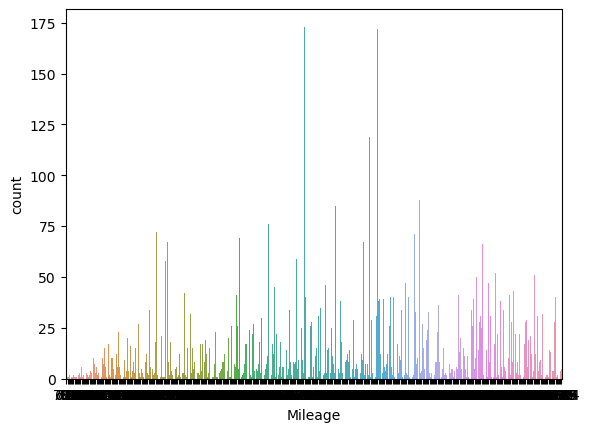

In [71]:
sns.countplot(x="Mileage",data=dfe)

<Axes: xlabel='Mileage', ylabel='Count'>

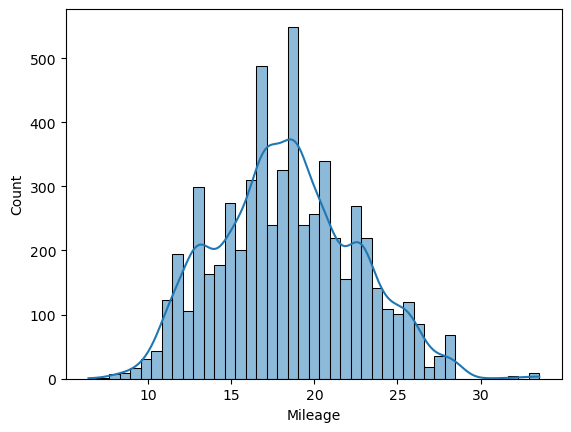

In [72]:
sns.histplot(dfe.Mileage,kde=True)

<Axes: xlabel='Engine', ylabel='Count'>

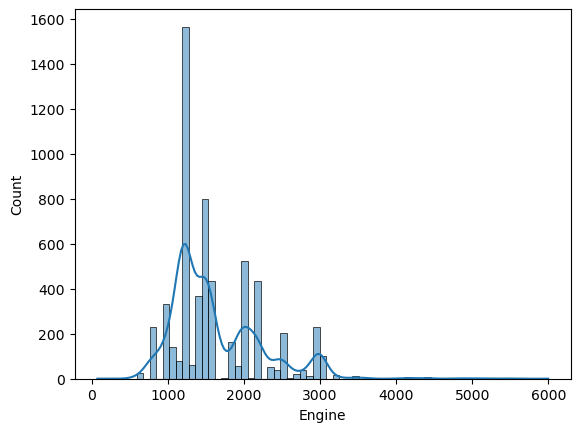

In [73]:
sns.histplot(dfe.Engine,kde=True)

<Axes: xlabel='Power', ylabel='Count'>

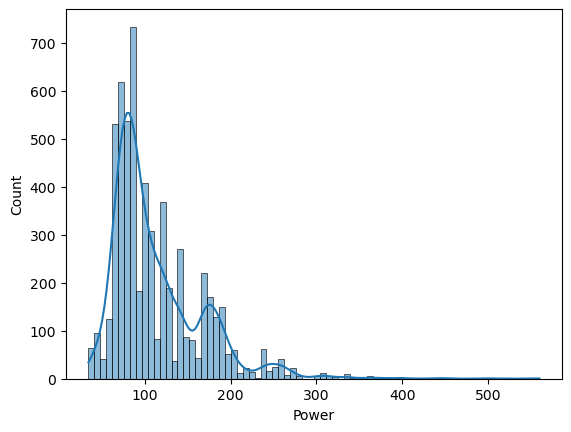

In [74]:
sns.histplot(dfe.Power,kde=True)

<Axes: xlabel='Seats', ylabel='Count'>

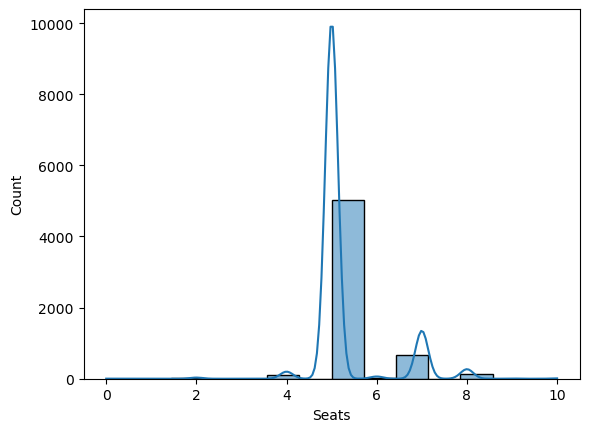

In [75]:
sns.histplot(dfe.Seats,kde=True)

In [112]:
# dfe["Mileage"]=dfe["Mileage"].fillna(dfe["Mileage"].mean())


In [76]:
dfe.Mileage=dfe.Mileage.fillna(dfe.Mileage.mean())
dfe.Engine=dfe.Engine.fillna(dfe.Engine.median())
dfe.Power=dfe.Power.fillna(dfe.Power.median())
dfe.Seats=dfe.Seats.fillna(dfe.Seats.mode()[0])

In [77]:
dfe["Mileage"].mean()

18.342252479408305

In [78]:
dfe.Seats.mode()[0]

5.0

In [79]:
dfe.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [131]:
X_train=dfe.drop(["Price","Fuel_Type_Electric"],axis=1)
y_train=dfe["Price"]

# Preprocessing for Test Data set

In [81]:
df_test=pd.read_csv("../../../Bigdata Files/test-data.csv")
df_test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [82]:
df_test.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000,1223.000000
mean,616.500000,2013.400324,58507.288493,5.284546
std,356.369424,3.179700,35598.702098,0.825622
min,0.000000,1996.000000,1000.000000,2.000000
25%,308.250000,2011.000000,34000.000000,5.000000
50%,616.500000,2014.000000,54572.500000,5.000000
75%,924.750000,2016.000000,75000.000000,5.000000
max,1233.000000,2019.000000,350000.000000,10.000000


In [83]:
df_test.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [85]:
df_test.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

In [86]:
df_test.Name.value_counts()

Maruti Alto LXi                                         9
Honda City 1.5 V MT                                     8
Maruti Swift Dzire VDI                                  8
Volkswagen Polo 1.2 MPI Highline                        8
Hyundai i10 Magna                                       7
                                                       ..
Hyundai Santro GLS I - Euro II                          1
Honda City i DTec VX Option BL                          1
Land Rover Discovery 4 SDV6 SE                          1
Hyundai Verna CRDi 1.6 SX Option                        1
Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde    1
Name: Name, Length: 769, dtype: int64

In [87]:
df_test.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

In [88]:
df_test.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [89]:
df_test1=pd.get_dummies(df_test[["Location","Fuel_Type","Transmission","Owner_Type"]],drop_first=True)
df_test1

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1230,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1231,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1232,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [90]:
dfe_test=pd.concat([df_test,df_test1],axis=1)
dfe_test

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,...,0,0,0,0,0,0,1,0,0,0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,...,0,0,0,0,0,1,1,0,1,0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,...,0,1,0,1,0,0,1,0,0,0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,...,0,0,0,1,0,0,1,0,0,0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,...,0,0,0,1,0,0,1,0,0,0
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,...,0,1,0,0,0,1,0,0,0,0
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,...,1,0,0,1,0,0,1,0,0,0
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,...,0,0,1,0,0,1,0,0,0,1


In [91]:
dfe_test.drop(["Unnamed: 0","Name","Location","Fuel_Type","Transmission","Owner_Type","New_Price"],axis=1,inplace=True)
dfe_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54 kmpl,1598 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08 kmpl,1461 CC,63.1 bhp,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.2 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [92]:
dfe_test.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       0
Engine                       10
Power                        10
Seats                        11
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [93]:
dfe_test.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Location_Bangalore             uint8
Location_Chennai               uint8
Location_Coimbatore            uint8
Location_Delhi                 uint8
Location_Hyderabad             uint8
Location_Jaipur                uint8
Location_Kochi                 uint8
Location_Kolkata               uint8
Location_Mumbai                uint8
Location_Pune                  uint8
Fuel_Type_Diesel               uint8
Fuel_Type_LPG                  uint8
Fuel_Type_Petrol               uint8
Transmission_Manual            uint8
Owner_Type_Fourth & Above      uint8
Owner_Type_Second              uint8
Owner_Type_Third               uint8
dtype: object

In [94]:
dfe_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54 kmpl,1598 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08 kmpl,1461 CC,63.1 bhp,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.2 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [95]:
dfe_test[dfe_test.Mileage==0]

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third


In [96]:
dfe_test["Mileage"]=dfe_test["Mileage"].str.replace("km/kg","")
dfe_test["Mileage"]=dfe_test["Mileage"].str.replace("kmpl","")
dfe_test["Engine"]=dfe_test["Engine"].str.replace("CC","")
dfe_test["Power"]=dfe_test["Power"].str.replace("bhp","")
# engine,mileage has null typed values
dfe_test["Mileage"]=dfe_test["Mileage"].str.replace("null","0")
dfe_test["Engine"]=dfe_test["Engine"].str.replace("null","0")
dfe_test["Power"]=dfe_test["Power"].str.replace("null","0")

dfe_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998,58.2,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.7,796,47.3,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68,2393,147.8,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59,1364,0,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.5,1197,82.85,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598,103.6,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21,1197,103.6,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08,1461,63.1,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.2,1197,103.6,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [97]:
dfe_test["Engine"]=dfe_test["Engine"].astype(float)
dfe_test["Mileage"]=dfe_test["Mileage"].astype(float)
dfe_test["Power"]=dfe_test["Power"].astype(float)

In [98]:
dfe_test

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998.0,58.20,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.70,796.0,47.30,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68,2393.0,147.80,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59,1364.0,0.00,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.50,1197.0,82.85,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598.0,103.60,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21,1197.0,103.60,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08,1461.0,63.10,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.20,1197.0,103.60,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [127]:
df_test[dfe_test.Power==0]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price


In [128]:
dfe_test.loc[dfe_test.Power==0,"Power"]

Series([], Name: Power, dtype: float64)

In [99]:
dfe_test.loc[dfe_test.Engine==0,"Engine"]=np.nan
dfe_test.loc[dfe_test.Mileage==0,"Mileage"]=np.nan
dfe_test.loc[dfe_test.Power==0,"Power"]=np.nan

<Axes: xlabel='Mileage', ylabel='Count'>

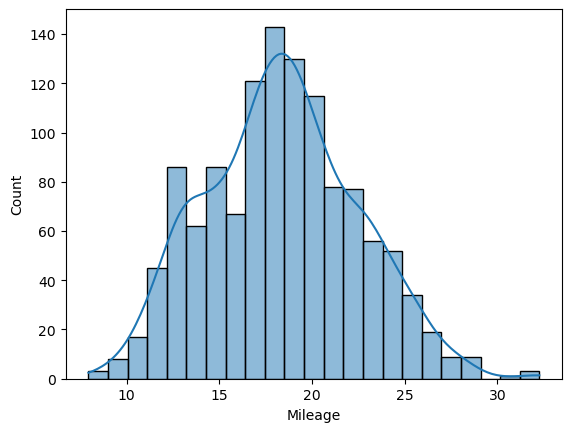

In [100]:
sns.histplot(dfe_test.Mileage,kde=True)

<Axes: xlabel='Engine', ylabel='Count'>

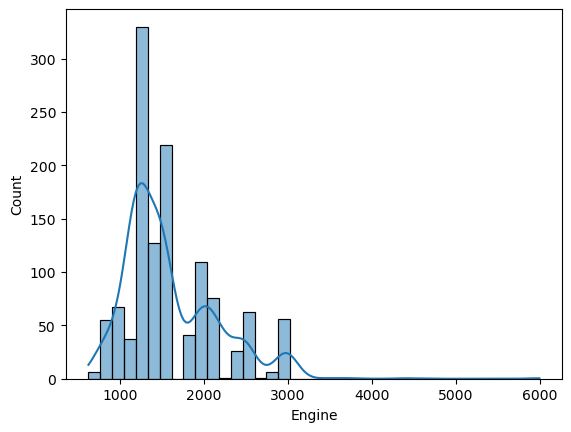

In [101]:
sns.histplot(dfe_test.Engine,kde=True)

<Axes: xlabel='Power', ylabel='Count'>

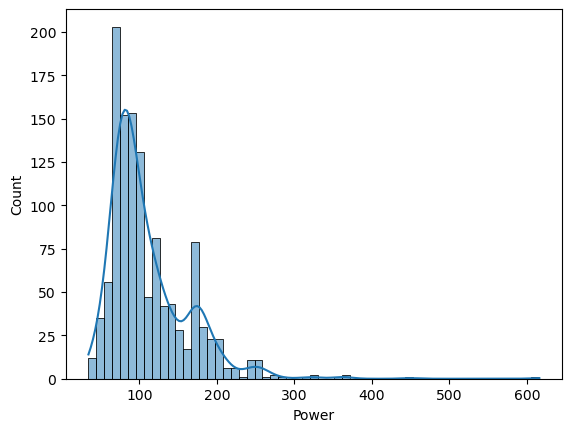

In [102]:
sns.histplot(dfe_test.Power,kde=True)

In [103]:
dfe_test.Mileage=dfe_test.Mileage.fillna(dfe_test.Mileage.mean())
dfe_test.Engine=dfe_test.Engine.fillna(dfe_test.Engine.median())
dfe_test.Power=dfe_test.Power.fillna(dfe_test.Power.median())
dfe_test.Seats=dfe_test.Seats.fillna(dfe_test.Seats.mode()[0])

In [104]:
dfe_test.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [105]:
dfe_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998.0,58.20,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.70,796.0,47.30,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68,2393.0,147.80,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59,1364.0,93.70,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.50,1197.0,82.85,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [106]:
dfe.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [107]:
print(dfe_test.columns)
print(dfe.columns)

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')
Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dt

In [120]:
print(dfe_test.shape)
print(dfe.shape)

(1234, 23)
(6019, 25)


In [137]:
print(X_train.columns)
print(X_test.columns)

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')
Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')


In [132]:
X_train.shape

(6019, 23)

In [119]:
dfe_test.shape

(1234, 23)

In [133]:
X_test=dfe_test

In [135]:
X_train.shape

(6019, 23)

In [136]:
X_test.shape

(1234, 23)